# Pokemon with seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Pokemon.csv',index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## scatter

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


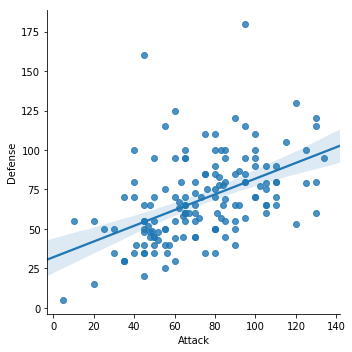

In [14]:
sns.lmplot(x='Attack',y='Defense',data=df)
#plt.grid(True)

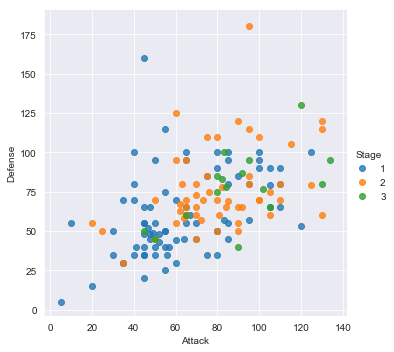

In [31]:
sns.set_style('darkgrid')

#去拟合线，并按进化阶段分组
sns.lmplot(x='Attack',y='Defense',data=df,
          fit_reg=False,
          hue='Stage')

***用matplotlib定制***

(0, 141.97310248937742)

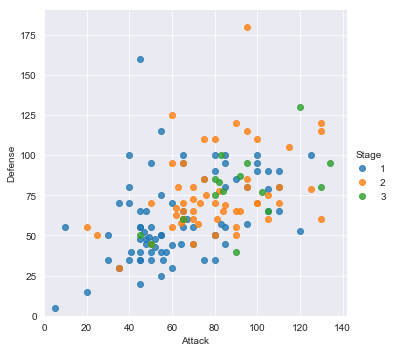

In [32]:
sns.set_style('darkgrid')

#设置数轴范围
sns.lmplot(x='Attack',y='Defense',data=df,
          fit_reg=False,
          hue='Stage')
plt.ylim(0,None)
plt.xlim(0,None)


## box

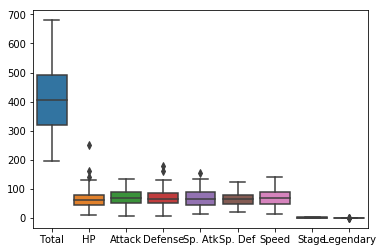

In [21]:
sns.boxplot(data=df)

In [23]:
new_df=df.drop(['Total','Stage','Legendary'],axis=1)

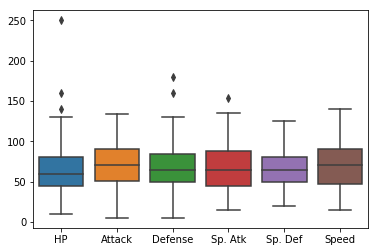

In [24]:
sns.boxplot(data=new_df)

## violin

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


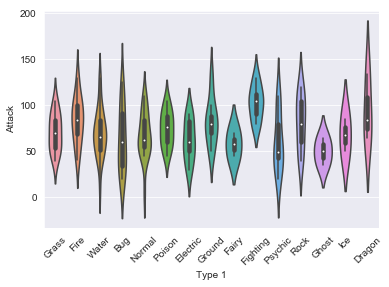

In [33]:
sns.set_style('darkgrid')

sns.violinplot(x='Type 1',y='Attack',data=df)

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

## swarm

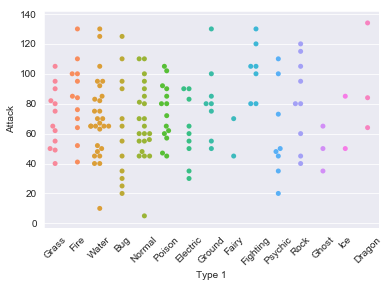

In [36]:
sns.swarmplot(x='Type 1',y='Attack',data=df,
             palette=None)
#palette=a color list

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

## multi-layer

Text(0.5,1,'Attack by Type')

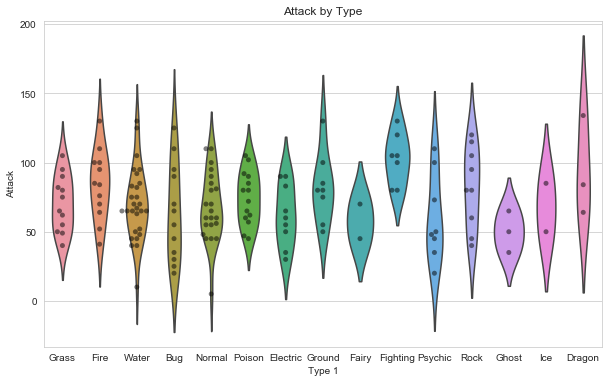

In [53]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=df,
              inner=None)

sns.swarmplot(x='Type 1',y='Attack',data=df,
             color='k',
             alpha=0.5)

plt.title('Attack by Type')

## heatmap

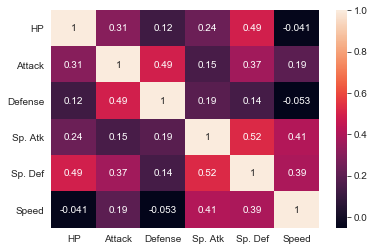

In [55]:
corr=new_df.corr()

sns.heatmap(corr, annot=True)

## histogram

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


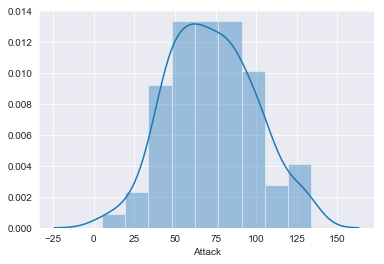

In [61]:
sns.set_style('darkgrid')
sns.distplot(df.Attack)

## joint distribution plot

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


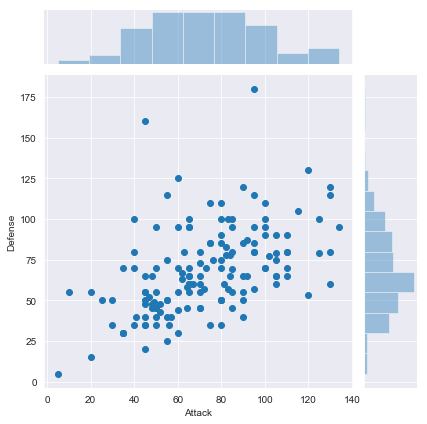

In [77]:
sns.jointplot(x='Attack',y='Defense',data=df)

## bar chart

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

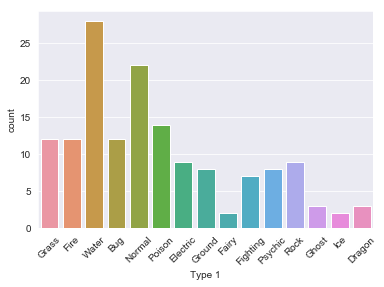

In [69]:
#每个属性有几个神奇宝贝
sns.countplot(x='Type 1',data=df)

#旋转x轴刻度标签
plt.xticks(rotation=45)

## factor plot

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


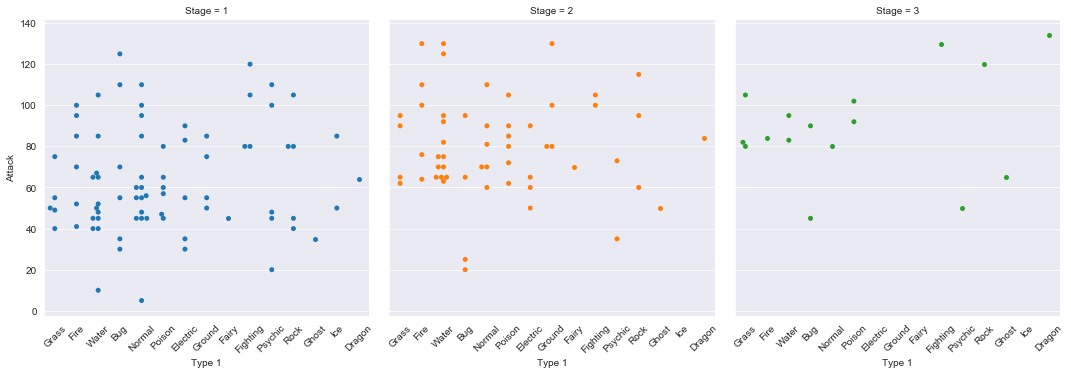

In [76]:
s=sns.factorplot(x='Type 1',y='Attack', data=df,
              hue='Stage', #用不同颜色表示stage
              col='Stage', #用stage分离图表
              kind='swarm') #图表形式，集群图

s.set_xticklabels(rotation=45)

## density plot

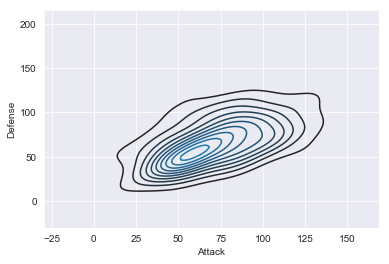

In [79]:
sns.kdeplot(df.Attack,df.Defense)